In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [135]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? (4б)** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [136]:
### Центрируем данные
X_centered = X - X.mean()

In [137]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PCA_dataset = pca.fit_transform(X_centered)

PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

print(pca.components_)

[[ 9.89504153e-01  1.67456754e-02  3.88032438e-03 -2.67133113e-03
   3.23669169e-05 -2.80854696e-02  4.78887289e-02  1.32185057e-01
  -9.23918757e-04 -1.92032786e-04  4.10621764e-04  7.64275048e-04
   4.40184814e-03  1.00389998e-03  4.46950621e-04 -9.81083117e-05
  -1.11995722e-03 -3.90634499e-04  4.14546786e-05 -3.28083049e-04
  -2.45326203e-04 -2.05846507e-04 -1.98948585e-04 -9.34997137e-05
   1.52642854e-05 -1.03102232e-05 -2.95387205e-05  4.15738497e-05]
 [ 3.15692794e-02  8.33545088e-04 -3.61553148e-04 -2.47558327e-04
   6.24585671e-04  9.99241232e-01 -9.53030021e-03 -2.06795239e-02
   1.87561465e-04 -9.35526926e-05 -7.51264624e-05  4.84092189e-06
   7.06835046e-04 -1.44284708e-04  9.17506762e-05 -9.80458413e-05
  -4.46594372e-05 -3.32321059e-05 -4.71129647e-05  6.59816544e-07
  -2.95215328e-05 -1.57672708e-05 -2.39336552e-06  7.14067958e-06
   1.47900878e-05  9.80257242e-07 -1.23595179e-05  2.03685844e-05]]


In [138]:
print(pca.explained_variance_ratio_)

[0.63176117 0.21129863]


Text(0, 0.5, 'Интегральная объяснимая дисперсия')

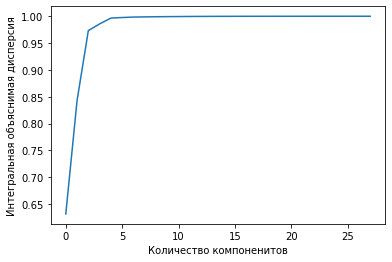

In [139]:
pca_1 = PCA()
pca_1.fit(X_centered)

plt.plot(np.cumsum(pca_1.explained_variance_ratio_)) # np.cumsum - Возвращает совокупную сумму элементов по заданной оси.
plt.xlabel('Количество компоненитов')
plt.ylabel('Интегральная объяснимая дисперсия')

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению (2б)**


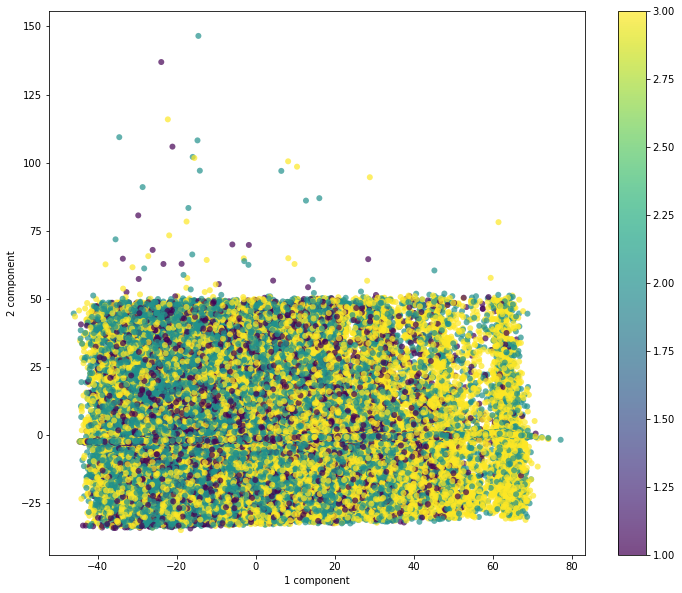

In [140]:
fig = plt.figure()
fig.set_size_inches(12, 10)

plt.scatter(PCA_dataset.PCA_1, PCA_dataset.PCA_2,
           c = df["Surge_Pricing_Type"], edgecolor = 'none', alpha = 0.7)
plt.xlabel('1 component')
plt.ylabel('2 component')
plt.colorbar()

In [141]:
first_component_corr = X.corrwith(PCA_dataset.PCA_1)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)


corrs = pd.concat((first_component_corr, second_component_corr),
                  axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


<AxesSubplot:>

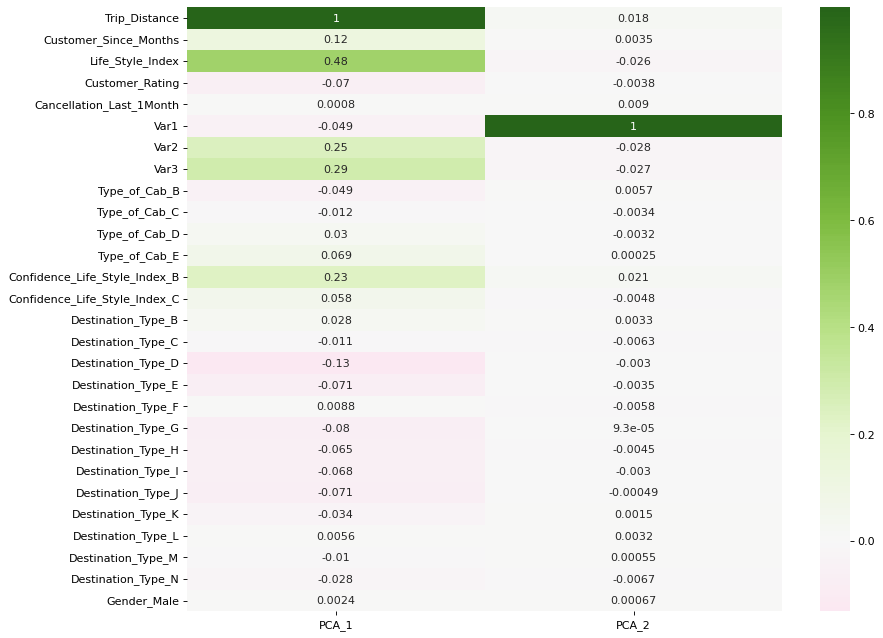

In [142]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corrs, xticklabels=corrs.corr().columns, 
            yticklabels=corrs.index, cmap="PiYG", center=0, annot=True)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой? (2б)**

In [143]:
pca.get_params().keys()

dict_keys(['copy', 'iterated_power', 'n_components', 'random_state', 'svd_solver', 'tol', 'whiten'])

In [144]:
pca.set_params(n_components = 3)

PCA(n_components=3)

In [145]:
PCA_dataset_2 = pca.fit_transform(X_centered)
PCA_dataset_2 = pd.DataFrame(PCA_dataset_2,  columns=['PCA_1', 'PCA_2', 'PCA_3'])

first_component_corr = X.corrwith(PCA_dataset_2.PCA_1)
second_component_corr = X.corrwith(PCA_dataset_2.PCA_2)
third_component_corr = X.corrwith(PCA_dataset_2.PCA_3)

corrs_2 = pd.concat([first_component_corr, second_component_corr, third_component_corr], axis = 1)
corrs_2.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corrs_2

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [146]:
PCA_dataset_2.corr()




,PCA_1,PCA_2,PCA_3
PCA_1,1.000000e+00,1.681207e-17,-3.462234e-17
PCA_2,1.681207e-17,1.000000e+00,8.439607e-17
PCA_3,-3.462234e-17,8.439607e-17,1.000000e+00


In [147]:
X.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,-0.049238,-0.011554,...,0.010783,-0.078761,-0.065450,-0.067025,-0.070772,-0.032169,0.006428,-0.009844,-0.027335,0.002173
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,-0.002355,0.004740,...,-0.020596,-0.023704,-0.005812,-0.038896,0.001861,-0.033298,-0.011319,0.001978,-0.021416,0.001326
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.002509,-0.033352,...,0.021958,-0.027208,-0.008661,-0.018124,-0.015995,-0.006097,0.003144,0.008153,-0.026124,0.000626
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,0.027020,-0.031793,...,0.055861,0.058156,0.012988,0.022421,0.012134,0.027700,0.033101,0.010281,0.018762,0.000468
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,-0.051113,0.026167,...,0.028450,0.004040,0.002679,0.007901,0.002417,0.011404,0.037134,0.003636,0.004370,0.002307
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,0.008309,-0.002987,...,-0.006899,0.003675,-0.001149,0.000149,0.003012,0.002711,0.002638,0.000995,-0.005564,0.000619
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,-0.007217,-0.005590,...,-0.032692,-0.042712,-0.016374,-0.024090,-0.020074,-0.017317,-0.015042,-0.002572,-0.011555,0.003183
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.003357,-0.012346,...,-0.025378,-0.034315,-0.007976,-0.025787,-0.016411,-0.028876,-0.007760,-0.004894,-0.016493,0.003520
Type_of_Cab_B,-0.049238,-0.002355,-0.002509,0.027020,-0.051113,0.008309,-0.007217,-0.003357,1.000000,-0.416698,...,-0.014112,-0.000101,-0.013176,-0.011938,-0.010108,-0.000693,-0.005531,-0.002502,0.001017,-0.000635
Type_of_Cab_C,-0.011554,0.004740,-0.033352,-0.031793,0.026167,-0.002987,-0.005590,-0.012346,-0.416698,1.000000,...,-0.012504,-0.006667,-0.004402,-0.006778,-0.003695,-0.010663,-0.002483,-0.003393,0.000726,-0.001079


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях (2б)**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [148]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [150]:
### Your code is here

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}


pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2)),('model', LogisticRegression())])

grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)


print(classification_report(y_test, grid.predict(X_test), digits= 4))

              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000      5372
           2     0.4774    0.6964    0.5665     11349
           3     0.4947    0.5032    0.4989      9612

    accuracy                         0.4838     26333
   macro avg     0.3240    0.3999    0.3551     26333
weighted avg     0.3863    0.4838    0.4263     26333



In [151]:
pipe_2 = Pipeline([('scaler', StandardScaler()),('model', LogisticRegression())])

grid_2 = GridSearchCV(pipe_2, param_grid, scoring = 'accuracy', cv = 5)
grid_2.fit(X_train, y_train)


print(classification_report(y_test, grid_2.predict(X_test), digits= 3))

              precision    recall  f1-score   support

           1      0.746     0.532     0.621      5372
           2      0.636     0.830     0.720     11349
           3      0.736     0.589     0.655      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.665     26333
weighted avg      0.695     0.681     0.676     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую (2б)**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [152]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga'))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(grid.predict(X_test), y_test, output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [153]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)
    
    

Wall time: 3min 51s


In [154]:
f1_score_dict[28]

0.686701013229254

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

<AxesSubplot:xlabel='Tsne_1st_component', ylabel='Tsne_2nd_component'>

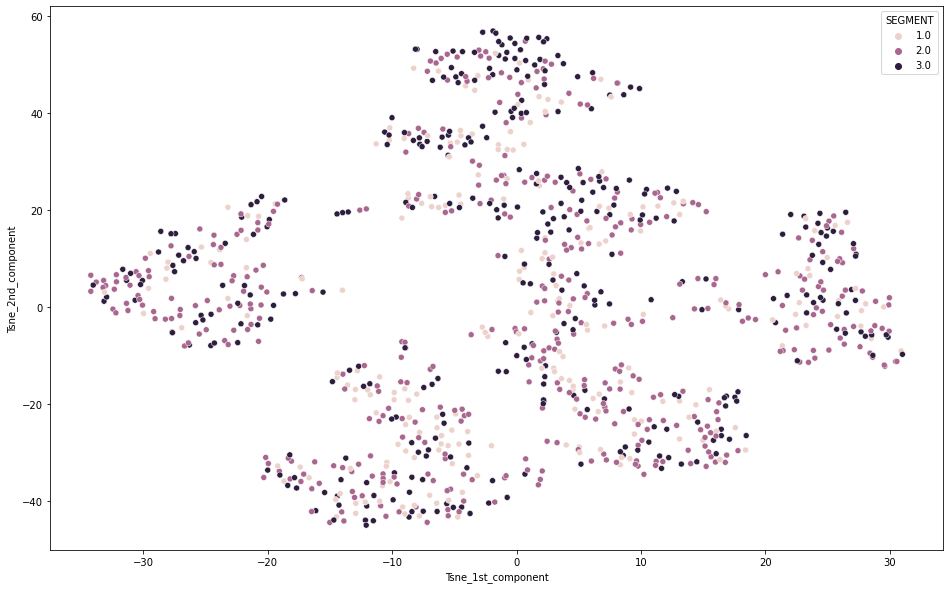

In [155]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Tsne = tsne.fit_transform(X_train[: 1000], y_train[: 1000])

Tsne = np.concatenate((Tsne,  y_train[: 1000].values.reshape(-1, 1)), axis = 1)
Tsne = pd.DataFrame(Tsne, columns = ['Tsne_1st_component',
                                       'Tsne_2nd_component', 'SEGMENT'])


import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)
    
sns.scatterplot(data=Tsne, x="Tsne_1st_component", 
                y="Tsne_2nd_component", 
                hue="SEGMENT")


**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

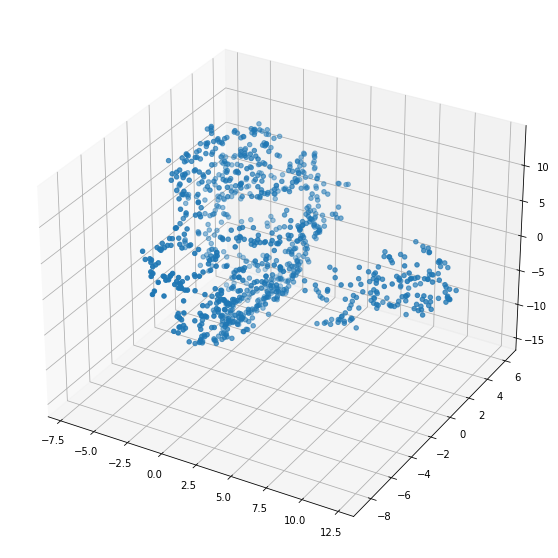

In [156]:
tsne_2 = TSNE(n_components=3)
Tsne_2 = tsne_2.fit_transform(X_train[:1000], y_train[:1000])

Tsne_2 = np.concatenate((Tsne_2,  y_train[:1000].values.reshape(-1, 1)), axis = 1)
Tsne_2 = pd.DataFrame(Tsne_2, columns = ['Tsne_1st_component',
                                       'Tsne_2nd_component', 'Tsne_3rd_component', 'SEGMENT'])

fig = plt.figure()
fig.set_size_inches(16, 10)

ax = plt.axes(projection='3d')

ax.scatter3D(Tsne_2['Tsne_1st_component'], 
             Tsne_2['Tsne_2nd_component'],
             Tsne_2['Tsne_3rd_component'])

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!